In [319]:
print("Hello world")

Hello world


In [320]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [321]:
import pandas as pd
import numpy as np

In [322]:


print(5*6)

30


In [323]:
#this is colab notebook

In [324]:
#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"


End to end multi class dog breed classification
this note book multi class image classifier using tenserflow 2.0

##1 .problem
identifyting the bread of the dog

##2.data
https://www.kaggle.com/c/dog-breed-identification/data

##3.evaluation
the evaluation is with prediction probs with each probs
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

##4.features

*we are dealing with images(unstuctured data) we should like to use deep leranning / transfer leraning

*there are 120 dog breads to identify
*there around 100000 + images training set
*there around 100000+ images in test set



#get our workspace ready

*import tensrflow 2.x

*import tenserflow hub

*make sure using gpu

In [325]:
#import tenserflow into colab
#import necessory tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version :",tf.__version__)
print("TF Version :",hub.__version__)

#check for the gpu availability
print("GPU","availabile(Yes !!!)" if tf.config.list_physical_devices("GPU") else "not available ")

TF Version : 2.5.0
TF Version : 0.12.0
GPU availabile(Yes !!!)


In [326]:
#import TF 2.X
#try:
#%tensflow_vesriononly exixsts in colab
#%tensflow_version 2.x
#except Exception:
#pass

In [327]:
#getting our data ready

#with all ml modules all the data need to be at numerical format. turning data in to numbers

#lets start by accesing our daa and checking ou the labels

In [328]:
#checkout labels of our data
import pandas as pd
labels_csv =pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head() )


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     002a283a315af96eaea0e28e7163b21b  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [329]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


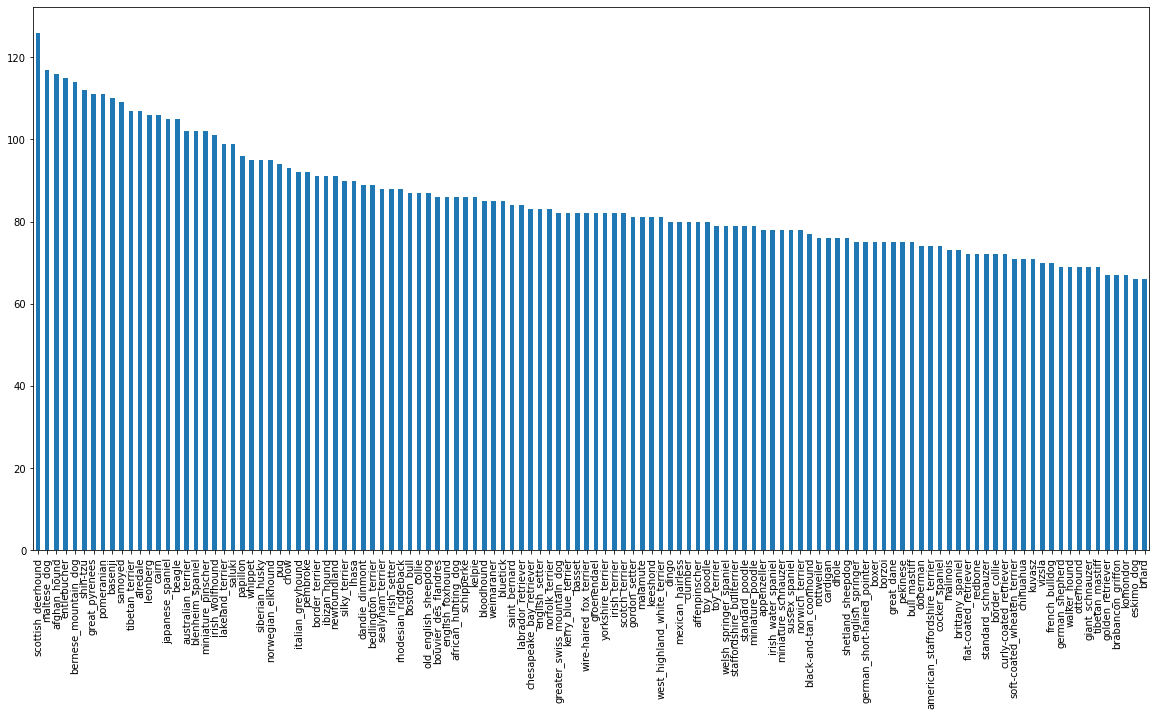

In [330]:
#how many images are for a breed

labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [331]:
labels_csv["breed"].value_counts().median()

82.0

In [332]:
# #lets view an image

# from IPython.display import Image
# Image("drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [333]:
#getting image sand their labels

#lets get the image from the path names

In [334]:
#crraete path names from image ID'S

filenames =["drive/MyDrive/Dog Vision/train/"+fname+".jpg" for fname in labels_csv["id"]]

#check the first 10
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [335]:
import os
os.listdir("drive/MyDrive/Dog Vision/train/")[:10]

['e308be2d0ae640f51c08166b2e3ce396.jpg',
 'e5128f2c854ffaa8e53b917edd0741e9.jpg',
 'e1d53fa88060cde37192028ee3ca4629.jpg',
 'e001b6f5092b2b90501111b23ab30d12.jpg',
 'e6a62f69da66da8492120ac8107f68c1.jpg',
 'e0cfa8c273838e25d74970683b285391.jpg',
 'e0629e36f6f2f4708db4b4d68bf1a75e.jpg',
 'dd5a3c84fb3c388ecf0b4da61eaef352.jpg',
 'e7f3274adaad369068602a422e9df192.jpg',
 'e0acf08c678ede145c9824dbb7c3718e.jpg']

In [336]:
#check whether names of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/"))==len(filenames):
  print("Filenames match actual amount of files !!! Proceed")

else:
  print("Filesnames do not match actual amount of files, check the target directory ")


Filenames match actual amount of files !!! Proceed


In [337]:
# #one more check 
# Image(filenames[9000])

In [338]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [339]:
labels =labels_csv["breed"].to_numpy()
# labels =np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [340]:
len(labels)

10222

In [341]:
#see if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")

else:
  print('Number of labels does not match nnumber of filenames, chek the dictoanry')

Number of labels matches number of filenames


In [342]:
#find the unique label values
unique_breeds =np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [343]:
labels_csv["breed"][6]

'bedlington_terrier'

In [344]:
len(unique_breeds)

120

In [345]:
#turn single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [346]:
len(labels)

10222

In [347]:
#turn every label into a boolean array
boolean_labels =[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [348]:
#example -turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [349]:
print(labels[2])
print(boolean_labels[2].astype(int))


pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [350]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Creating a own validation set
 
 *we need to create own validation set

In [351]:
#setup X and y varibales
X= filenames
y=boolean_labels



we are going to start from 1000 images and then increse at the end

In [352]:
#set number of images to used expreimenting
NUM_IMAGES =1000 #@param {type:"slider",min:1000,max:10000}

In [353]:
#lest's split the data into tarin and validation set

from sklearn.model_selection import train_test_split

#split them into tarining and validation of totl size NUM-import
X_train,X_val,y_train,y_val =train_test_split(X[:NUM_IMAGES],
                                              y[:NUM_IMAGES],
                                              test_size=0.2,
                                              random_state=42)

len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [354]:
#lets have a geesze on data
X_train[:2],y_train[:2]



(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

##Preprocessing images (turning images into tensores)

*to preprocess our images into tesores we are going to write  a fucntion which does few things

1.take an image filepath as input

2.ue tenserflow to read file and save it to a variable `image`

3.turn the image into tesors

4.noramlize the image (convert colur image values to 0-255 to 0-1)

5.resize the image to be shape of (224,224)

6.return the modiied image



In [355]:
#convert image into numpy array

from matplotlib.pyplot import imread
image =imread(filenames[42])
image.shape

(257, 350, 3)

In [356]:
image.max(),image.min()


(255, 0)

In [357]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [358]:
#turn image into tensors

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [359]:
#Define the iamge Size
IMG_SIZE=224

#create a function for preprocessing images

def process_image(image_path):
  """
  Takes the image from pat and turnn into tensors
  """
  #read the an image file
  image = tf.io.read_file(image_path)

  #turn jpg image into numercal tensor with thee colur channels(RED,GREEN,BLUE)

  image =tf.image.decode_jpeg(image,channels=3)

  #convert the colur chneel value from 0 to 255 to 0-1 values
  image =tf.image.convert_image_dtype(image,tf.float32)

  #resize the image to desired size

  image =tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image




In [360]:
 ##turning the data into batches
 #in order to use tensorflow effectively, we need our data in a form of tensor tuples .(image,label)
 

In [361]:
#create a simlpe function to return a tuple(image,label)

def get_image_label(image_path,label):
  """
  Takes an image file path name and the assiciated label, process the image and returns the tuple of (image,label)
  """

  image =process_image(image_path)
  return image,label

In [362]:
#demo of the above
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we got a way to turn data into tuples and tensors in the form `(image,label)` lets make a fucntion to turn all data our data (X & y) into batches

In [363]:
#define the batch size, 32 is good
BATCH_SIZE =32

#crate fucntion to turn data into batches
def create_data_batches(X,y,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs
  shuffeles the data it its taraning data but doenot shuffle its validation data
  also accepts test data as input (no labels)
  """

  #if the data is a test dataset, we probley dont have labels
  if test_data:
    print("creating the test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))#onlt filepaths,no labels
    data_batch =data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  #if the data is a valid dataset, we doe not need to shuffle this
  elif valid_data:
    print("Creating validation data batches .....")
    data =tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    data_batch =data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("craeting tarining data batches ....")
    #turn filepathes and labels into tensores

    data =tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    
    #shuffeling pathnames and labels befeore mapping image processor function is faster than shuffling images
    data =data.shuffle(buffer_size=len(X))

    #cearte image label tuples (this also truns image path into preproceed image)
    data= data.map(get_image_label)

    #turn the train data into bathes
    data_batch =data.batch(BATCH_SIZE)

  return data_batch   

In [364]:
#craete a taraiaing and validation data batches

train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)


craeting tarining data batches ....
Creating validation data batches .....


In [365]:
#Check out different attributes of the data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [366]:
#visulazing data batches

Our data is on batches, these hard to understand ,so lets visulaze them

In [367]:
import matplotlib.pyplot as plt

#craete a fucntion for viewing images in a data batch
def show_25_images(images,labels):
  
  """
  Displys a plot of 25 images and thier labels from a data batch
  """

  #setup the figure
  plt.figure(figsize =(10,10))
  
  #loop thought the 25 images
  for  i in range(25):
    #create subplots  (5 rows,5 columns)
    ax = plt.subplot(5,5,i+1)

    #display images
    plt.imshow(images[i])

    #add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

    

In [368]:
train_images,train_labels =next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

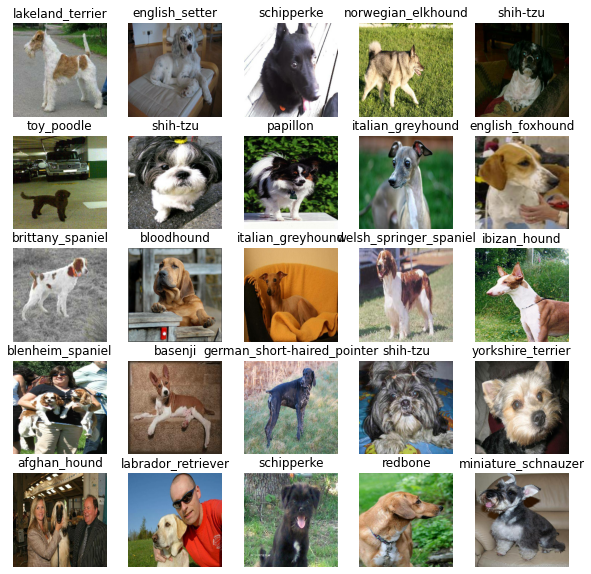

In [369]:
#now visulizeed the data in a tarining batch
show_25_images(train_images,train_labels)

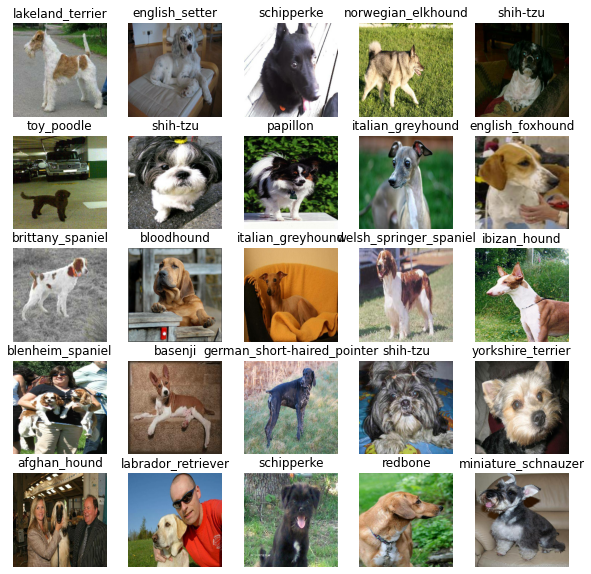

In [370]:
#now lets visulize the validation set
val_images,val_labels =next(val_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

In [371]:
#building a model
#before build a model ,few need to define


*The input shape (our images shape,n a form of tesores) to our model

*the output shape(image labels,in the form of tensores) of our models

*the url of the model we want to use 
https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5



In [372]:
#setup input shape to the model
INPUT_SHAPE =[None,IMG_SIZE,IMG_SIZE,3]#batch,height,width,colur chnnels

#setup the output shape of our model
OUTPUT_SHAPE=len(unique_breeds)

#setup model url from tensnor flow hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5"

now we got our input output model. Lets put them together into a keras deep lerning model.

knowing these create a fucnton which,

*takes thhe input shape, output shape and the model chosen parameters

*define the layers in keras model in sequenional fashion 

*compiles the model (how to evaluate and improve)

*builds th model (tells the model the input shape and it be getting)

*return the model

*all the steps
https://www.tensorflow.org/guide/keras/sequential_model


In [373]:
#create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):

  print("Building a Model with :",MODEL_URL)

  #setup the modle layers
  model =tf.keras.Sequential([
  hub.KerasLayer(MODEL_URL),#Layer 1 (input layer)
  tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax")#layer 2(output)                                             
   ])

  #compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #build the model
  model.build(INPUT_SHAPE)

  return model






In [374]:
model =create_model()
model.summary() 

Building a Model with : https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 1001)              6158505   
_________________________________________________________________
dense_6 (Dense)              (None, 120)               120240    
Total params: 6,278,745
Trainable params: 120,240
Non-trainable params: 6,158,505
_________________________________________________________________


In [375]:
outputs =np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

In [376]:
#craeting the callbacks
#callbacks are helper functions a model can use during the training a.check it mporvinf when model stops the improving

*we craete two callbakcs , one for tensor board and another for early stoping to prevent training more without improving

#TenseorBoard Callback

*setup tensorboard callback we need to do 3 things 

1.load the tensorboard notebook extention

2.create a tensorboard callback which is able to save logs to a durectory and pass it to the our model `fit()` function

3.visualize our model training logs with the `%tensorbaord` magic funtion

In [377]:
#load the tensorboard notebook extention
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [378]:
import datetime
#crate a funtion to build tensorbaord callback

def create_tensorboard_callback():
  #create a log directory for storing tensorboard logs
  logdir=os.path.join("drive/MyDrive/Dog Vision/logs",
                      #make it so logs get tracked whenver e run an experiment
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)


#early stopping callback

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

early stoping helps to stop our model from overfitting by stoping training if a ceraian metrics stop improving


In [379]:
#create  early stoping callback
early_stoping =tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3,)

In [380]:
#Training the Model(on the subset of data)




our first model only going to train 1000 images to make sure everything is working



In [381]:
NUM_EPOCHS=100 #@param {type :"slider",min:10,max:100,step:10}

In [382]:
#check whetr stil running on gpu
print("GPU" ,"Available Yes !!!" if tf.config.list_physical_devices("GPU") else "not available")

GPU Available Yes !!!


In [383]:
# #create a funcin to trains the model

# *Create model using `create model()`

# *setup a tensorboard callback using `create_tensorboard_callback()`

# *call the fit () fucntion to pass data to the model

In [384]:
#build a fucntion to train and return a trained model

def train_model():
  """
  Trains a given model and returns the tarined version
  """

  #create a model 
  model=create_model()

  #crate new tensorboard session everytime we train  model
  tensorboard =create_tensorboard_callback() 

  #fit the model to the data passing it the callbacks 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stoping])
  
  #return the fitted model
  return model



In [385]:
#fit the model to the data

model =train_model()


Building a Model with : https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Epoch 1/100
25/25 [==============================] - 8s 218ms/step - loss: 4.5134 - accuracy: 0.1063 - val_loss: 3.4238 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 3s 120ms/step - loss: 1.6201 - accuracy: 0.6888 - val_loss: 2.1849 - val_accuracy: 0.5450
Epoch 3/100
25/25 [==============================] - 3s 118ms/step - loss: 0.5582 - accuracy: 0.9362 - val_loss: 1.6781 - val_accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 3s 118ms/step - loss: 0.2459 - accuracy: 0.9887 - val_loss: 1.5028 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 3s 119ms/step - loss: 0.1412 - accuracy: 0.9987 - val_loss: 1.4203 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 3s 115ms/step - loss: 0.0964 - accuracy: 1.0000 - val_loss: 1.3785 - val_accuracy: 0.6700
Epoch 7/100
25/25 [===========================

Overfitting with the begining is good ,Beacuse it will tell that model is learning.

##Checking the TensorBoard Logs

*tensirboard magic function (`5tensoirboard `) will acces and visulize the conensts

In [386]:
 %load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [387]:
%tensorboard --logdir 


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2021-05-26 07:22:01.830543: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_

In [388]:
##making and evalutaing predictions useing the modle



In [389]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [390]:
#make predictions on validation data(not used to train)

predictions =model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 81ms/step


array([[3.58009507e-04, 1.87414582e-04, 1.78187562e-04, ...,
        2.53527305e-05, 2.79773230e-05, 1.41361277e-04],
       [1.04086194e-03, 2.84338254e-04, 1.09622744e-03, ...,
        1.05975196e-03, 2.45495728e-04, 6.83661143e-04],
       [1.02065005e-05, 2.72949510e-05, 2.56705698e-05, ...,
        9.43368377e-06, 1.22643860e-05, 2.72731450e-05],
       ...,
       [5.52378115e-05, 2.35552914e-04, 8.74591569e-05, ...,
        1.99136794e-05, 7.35589856e-05, 7.58131617e-04],
       [8.22694929e-05, 2.87181210e-05, 6.77789922e-06, ...,
        4.36059327e-06, 1.78874725e-05, 5.05631557e-04],
       [7.22344848e-04, 8.34991442e-05, 1.46170787e-03, ...,
        1.17875449e-02, 1.59409479e-03, 1.32842993e-04]], dtype=float32)

In [391]:
predictions.shape

(200, 120)

In [392]:
len(y_val)

200

In [393]:
len(unique_breeds)

120

In [394]:
predictions[0]


array([3.5800951e-04, 1.8741458e-04, 1.7818756e-04, 1.8550745e-04,
       7.9725600e-05, 6.4170883e-05, 1.3887618e-02, 2.8376019e-04,
       3.7394086e-04, 3.2486438e-05, 7.7162421e-04, 1.0443814e-04,
       6.6123338e-04, 3.2066312e-04, 1.0646382e-05, 1.4328119e-05,
       1.5085295e-05, 6.7649498e-03, 2.8567732e-05, 5.8633566e-05,
       6.4536296e-05, 6.4707499e-05, 1.8483857e-05, 3.7812565e-03,
       2.6387997e-05, 4.1498832e-05, 1.4065790e-01, 5.8150978e-05,
       1.6402167e-04, 5.0258066e-04, 4.8874073e-05, 4.3546656e-04,
       1.0344056e-04, 8.9268593e-05, 1.9065563e-05, 4.1267030e-02,
       6.0575734e-05, 3.0163957e-05, 2.8491713e-04, 3.1200456e-05,
       3.1936515e-04, 1.2319577e-05, 7.8657562e-05, 3.0746367e-05,
       5.9500389e-06, 1.6649901e-04, 3.7038928e-06, 1.4144199e-05,
       1.9099339e-03, 8.2763101e-05, 2.5550713e-04, 4.0040482e-05,
       8.2624110e-04, 1.3654935e-04, 5.0779960e-05, 9.1608825e-05,
       2.0864414e-05, 1.9090726e-03, 3.0219702e-05, 2.7513813e

In [395]:
for i in range(0,len(predictions)):
  print(sum(predictions[i]))


0.999999946300477
0.9999999479205144
0.9999999750864816
1.0000000224930545
1.0000001144394375
1.0000000500688202
0.9999999862124014
0.9999999946148534
0.9999999481972282
0.9999999601380409
1.0000000364738497
1.0000000585168891
1.0000000097045998
1.0000001263645117
1.0000000008089955
0.999999986101102
0.9999997943446033
1.0000001289151896
0.9999999822503014
0.9999999590218067
1.0000000040081432
0.9999999829718433
1.0000000774384716
1.0000001212183633
1.000000028072435
0.9999999551232577
1.0000002842372169
1.0000000308598374
1.0000001108330707
0.9999999185354227
0.9999999797610144
1.0000000158434545
0.9999999157325874
1.0000000530128546
0.9999999964271638
1.0000001227801931
1.0000000564159564
0.9999998825660441
1.0000000126410669
1.0000000091313268
0.9999999576552909
0.999999961773824
0.9999999583778845
1.0000000097179509
1.0000000790914783
1.0000000365567416
0.9999998286897949
1.0000000016843842
0.9999999958426997
1.0000001005126222
0.9999998540315573
1.00000001016042
1.000000014944817


In [396]:
#First Prediction
index=42
print(predictions[0])
print(f"Max Value (probability of predictions):{np.max(predictions[index])}")
print(f"Sum :{np.sum(predictions[index])}")
print(f"Max Index :{np.argmax(predictions[index])}")
print(f"Predicted Label :{unique_breeds[np.argmax(predictions[index])]}")

[3.5800951e-04 1.8741458e-04 1.7818756e-04 1.8550745e-04 7.9725600e-05
 6.4170883e-05 1.3887618e-02 2.8376019e-04 3.7394086e-04 3.2486438e-05
 7.7162421e-04 1.0443814e-04 6.6123338e-04 3.2066312e-04 1.0646382e-05
 1.4328119e-05 1.5085295e-05 6.7649498e-03 2.8567732e-05 5.8633566e-05
 6.4536296e-05 6.4707499e-05 1.8483857e-05 3.7812565e-03 2.6387997e-05
 4.1498832e-05 1.4065790e-01 5.8150978e-05 1.6402167e-04 5.0258066e-04
 4.8874073e-05 4.3546656e-04 1.0344056e-04 8.9268593e-05 1.9065563e-05
 4.1267030e-02 6.0575734e-05 3.0163957e-05 2.8491713e-04 3.1200456e-05
 3.1936515e-04 1.2319577e-05 7.8657562e-05 3.0746367e-05 5.9500389e-06
 1.6649901e-04 3.7038928e-06 1.4144199e-05 1.9099339e-03 8.2763101e-05
 2.5550713e-04 4.0040482e-05 8.2624110e-04 1.3654935e-04 5.0779960e-05
 9.1608825e-05 2.0864414e-05 1.9090726e-03 3.0219702e-05 2.7513813e-02
 2.4233377e-05 6.4210035e-06 1.4914596e-03 2.3420980e-05 2.7861846e-05
 5.6206610e-02 4.7704975e-06 8.2849929e-06 5.8349557e-02 1.3823948e-04
 5.733

Having above functionality is great .And it would be better we could see the image the prediction is being made on

predciton probability known as confidence level 

In [397]:
#turn probabiltiy to respectieve label
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """

  return unique_breeds[np.argmax(prediction_probabilities)]

#get a predicted label based on an array of predction label
pred_label =get_pred_label(predictions[81])
pred_label

'cardigan'

Since our validation data is still in a batch data set , w ehave to unbatuchyfy it to make predictions

In [398]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [399]:
#create A fucntion to unbatch the data set
images_ =[]
labels_=[]

#loop thorugh unbatch data
for image,label in val_data.unbatch().as_numpy_iterator():
  # print(image)
  # print(label)
  images_.append(image)
  labels_.append(label)

images_[0],labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [400]:
get_pred_label(labels_[0])

'cairn'

In [401]:
get_pred_label(predictions[0])

'lhasa'

In [402]:
#craete a function to unbatcg a batch data set
def unbatchify(data):
  """
  Takes a batched data set of (image,label) tensors and returns seperate arrays of images and labels
  """

  images =[]
  labels =[]

  #loop though unabached data

  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images,labels


#unbatichfy the validation data

val_images,val_labels =unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we got ways to get :

*prediction labels

*validation labels

*validation images

lets make ssome function these all a bit more visualized

takes an array of precitions probablities ,an array of truth labels and an array of truth labels and an images and intergers 

convert the prediction probablities predictions to a predictd label

plot the predcited label .it s predicted prblities a, the truth label and the image o na sigle plot.

In [403]:
def plot_pred(prediction_probabilities,labels,images,n=1):

  """
  View the predciton,gorund truth amd the iamge for sa sample n
  """

  pred_prob,true_label,image =prediction_probabilities[n],labels[n],images[n]

  #get the pred label
  pred_label=get_pred_label(pred_prob)

  #plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #cnage the colour of the title dependington the predction

  if pred_label==true_label:
    color="green"

  else:
    color ="red"

  #chnage plot title to be prdicted ,probabiltiy of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                     true_label),
                                    color =color)



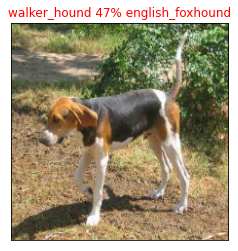

In [404]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=42)

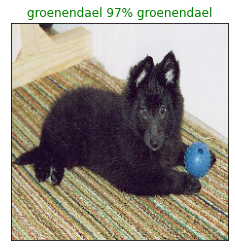

In [405]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

now we have a fucntion to visulzie oue model top predcions, lets mak a anothe rview oue model top 10 predctions.

this fucnction will:

*tale an input of predcitons  problities array and ground truth array and integer

*find the prediction using `get_pred_label()`

*find the top 10 
  *prediction probilities indexes
  *prediction problities values
  *prediction labels

*plot the top 10 predciton problities values and labels

In [406]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n
  """

  pred_prob,true_label =prediction_probabilities[n],labels[n]

  #get the predicted label
  pred_label =get_pred_label(pred_prob)

  #fing the top 10 predction confidence indexes
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  
  #find the top 10 predction values
  top_10_pred_values=pred_prob[top_10_pred_indexes]

  #find the top 10 prediction labels
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]

  #setup the plot
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_pred_values,
                   color="gray")
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  #change the colour of true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  
  else:
    pass

In [407]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.57336533, 0.1406579 , 0.05834956, 0.05620661, 0.04126703,
       0.02751381, 0.01543607, 0.01388762, 0.01267572, 0.00781009],
      dtype=float32)

In [408]:
predictions[0].max()



0.57336533

In [409]:
predictions[0]


array([3.5800951e-04, 1.8741458e-04, 1.7818756e-04, 1.8550745e-04,
       7.9725600e-05, 6.4170883e-05, 1.3887618e-02, 2.8376019e-04,
       3.7394086e-04, 3.2486438e-05, 7.7162421e-04, 1.0443814e-04,
       6.6123338e-04, 3.2066312e-04, 1.0646382e-05, 1.4328119e-05,
       1.5085295e-05, 6.7649498e-03, 2.8567732e-05, 5.8633566e-05,
       6.4536296e-05, 6.4707499e-05, 1.8483857e-05, 3.7812565e-03,
       2.6387997e-05, 4.1498832e-05, 1.4065790e-01, 5.8150978e-05,
       1.6402167e-04, 5.0258066e-04, 4.8874073e-05, 4.3546656e-04,
       1.0344056e-04, 8.9268593e-05, 1.9065563e-05, 4.1267030e-02,
       6.0575734e-05, 3.0163957e-05, 2.8491713e-04, 3.1200456e-05,
       3.1936515e-04, 1.2319577e-05, 7.8657562e-05, 3.0746367e-05,
       5.9500389e-06, 1.6649901e-04, 3.7038928e-06, 1.4144199e-05,
       1.9099339e-03, 8.2763101e-05, 2.5550713e-04, 4.0040482e-05,
       8.2624110e-04, 1.3654935e-04, 5.0779960e-05, 9.1608825e-05,
       2.0864414e-05, 1.9090726e-03, 3.0219702e-05, 2.7513813e

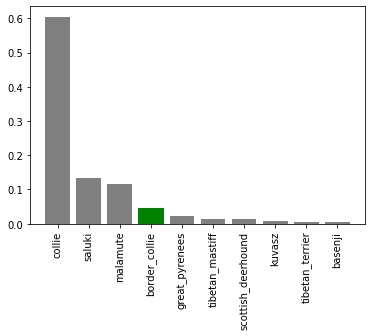

In [410]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we got some fuctinons to help us visulize the fuction to help. lets check out few values



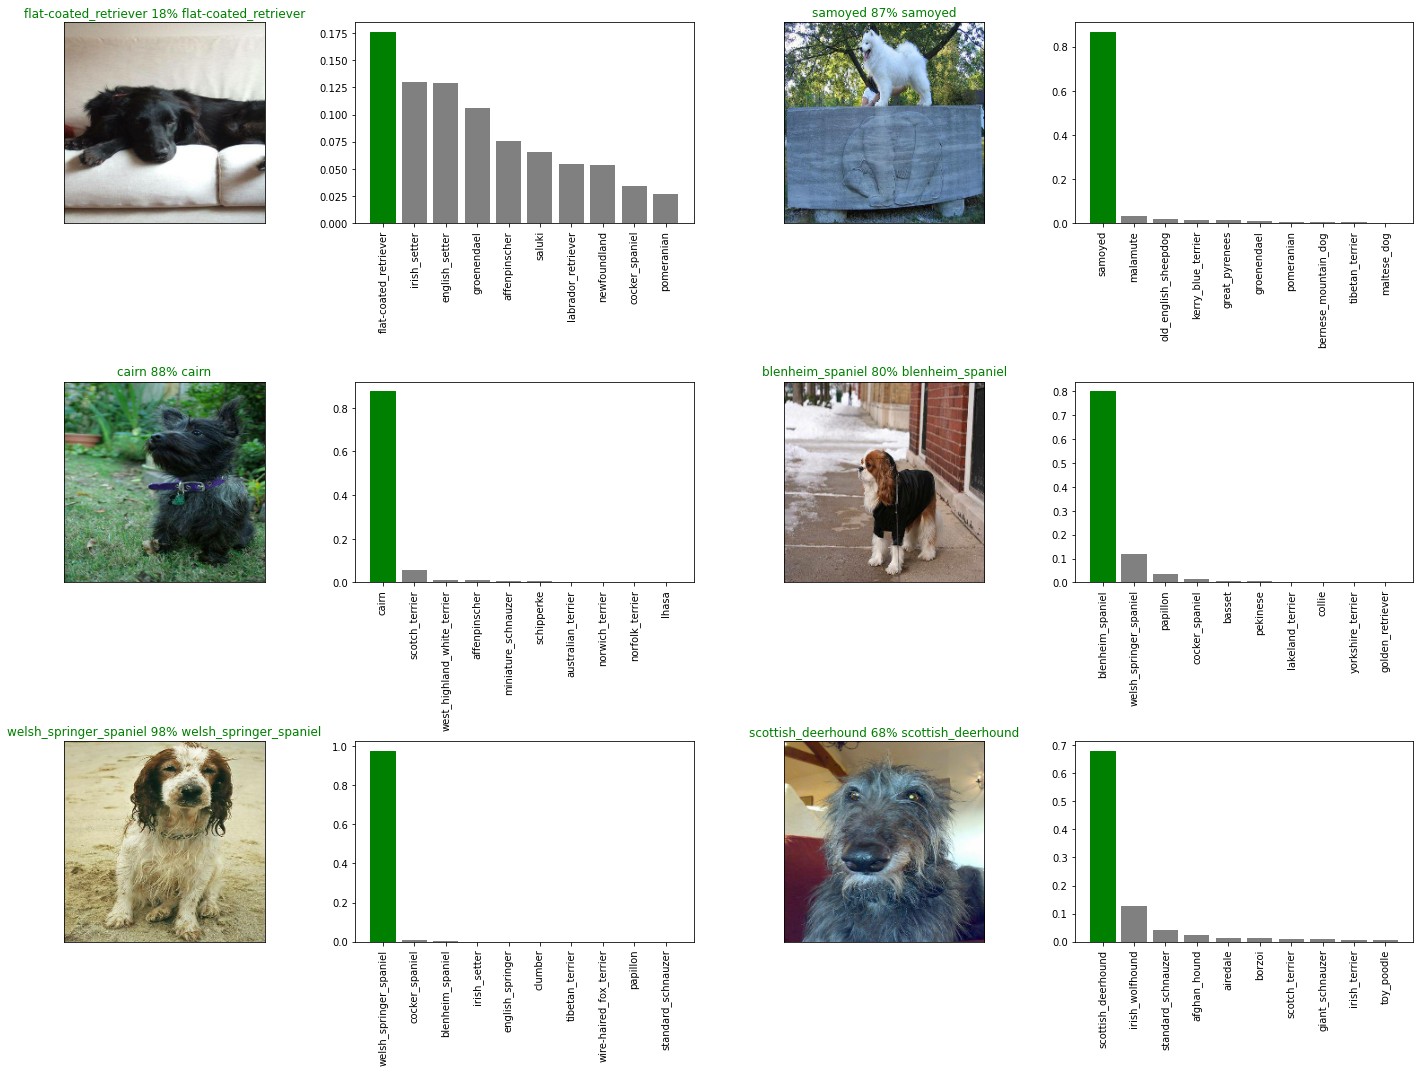

In [411]:
#lets check out few predctions and different values
i_multiplier=20
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout()
plt.show()

In [412]:
#try to craete a confution matix

##Saving and Relaod the created Model

In [413]:
#caeate a fucntion to save the model

def save_model(model,suffix=None):
  """
  Saves the given model in a models directory and append suffix string
  """

  #cretae a model directory path name with current time

  modeldir=os.path.join("/content/drive/MyDrive/Dog Vision/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path =modeldir + "_" + suffix +".h5" #save format of the model
  print(f"saving model to :{model_path}...")
  model.save(model_path)
  return model_path




In [414]:
#create a fucntion to load the modle

def load_model(model_path):
  
  """
  Load saved model from specified path
  """

  print(f"Loading saved Model from :{model_path}")
  model =tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer":hub.KerasLayer})
  
  return model

Now we got fucntions to save and load model

In [415]:
# #save our model on tarined on 1000 images
# save_model(model,suffix="1000-images-mobilenetv2-Adam")

saving model to :/content/drive/MyDrive/Dog Vision/models/20210526-07221622013728_1000-images-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog Vision/models/20210526-07221622013728_1000-images-mobilenetv2-Adam.h5'

In [416]:
#load model Trained Model
loaded_1000_image_model=load_model("/content/drive/MyDrive/Dog Vision/models/20210526-07141622013243_1000-images-mobilenetv2-Adam.h5")

Loading saved Model from :/content/drive/MyDrive/Dog Vision/models/20210526-07141622013243_1000-images-mobilenetv2-Adam.h5


In [417]:
#Evaluate pre saved model

model.evaluate(val_data)

7/7 [==============================] - 1s 76ms/step - loss: 1.2312 - accuracy: 0.7150


[1.2312204837799072, 0.7149999737739563]

In [418]:
#evaluate loaded Model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 77ms/step - loss: 1.2800 - accuracy: 0.6750


[1.2800474166870117, 0.675000011920929]